In [1]:
import argparse
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, Subset
import torchvision
from torchvision import transforms
from torchinfo import summary

from unet.dataset.data_path import KITTI_SEM_TRAIN_RGB_PATHS, KITTI_SEM_TRAIN_LABEL_PATHS
from unet.dataset.kitti import KITTI_SEM
from unet.dataset.kitti import HorizontalFlip
from unet.models.unet import UNet
from unet.models.model_utils import showSegModelInference
from unet.train_mult import trainSeg

/home/ruohuali/Desktop/depth-estimation/EECS442-final-project


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shapes (120, 360, 3) (120, 360) (376, 1241, 3) (376, 1241) (120, 360, 3)


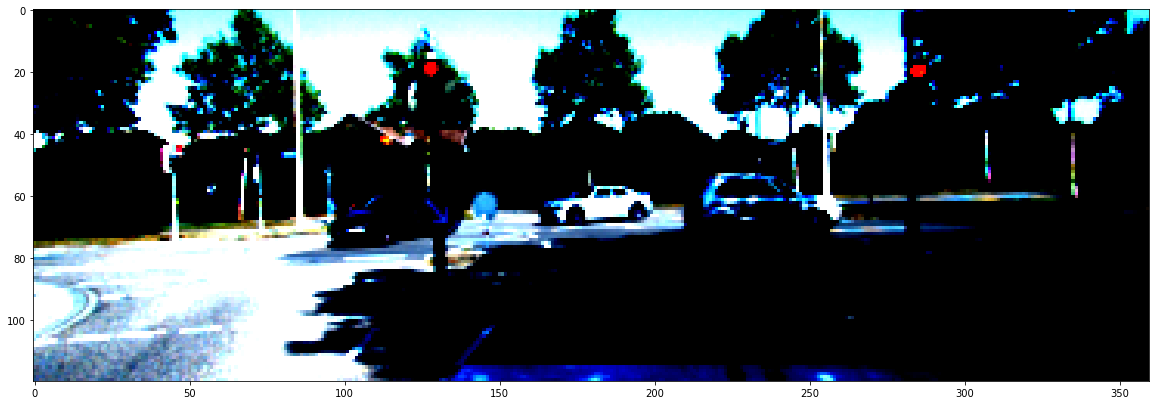

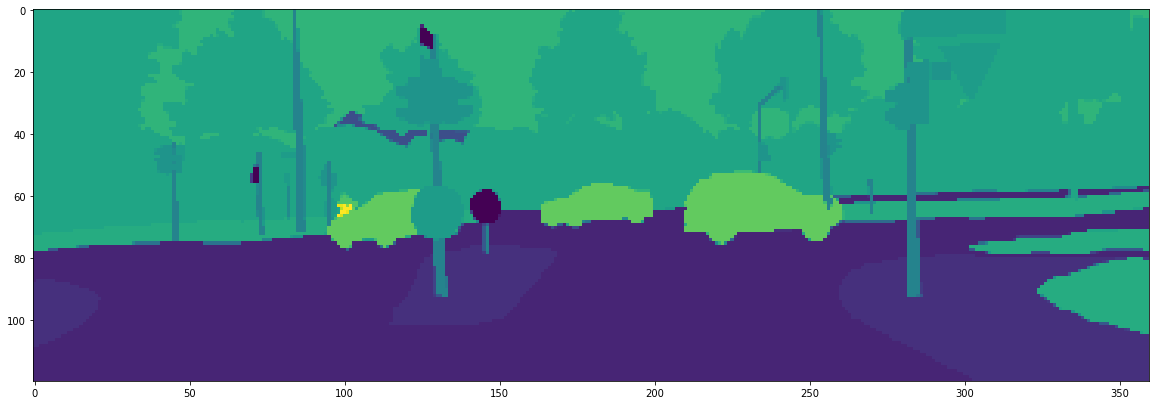

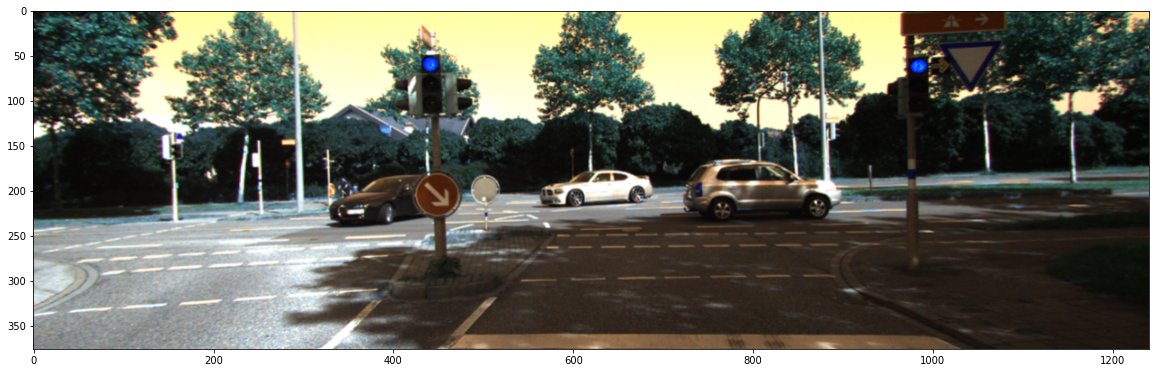

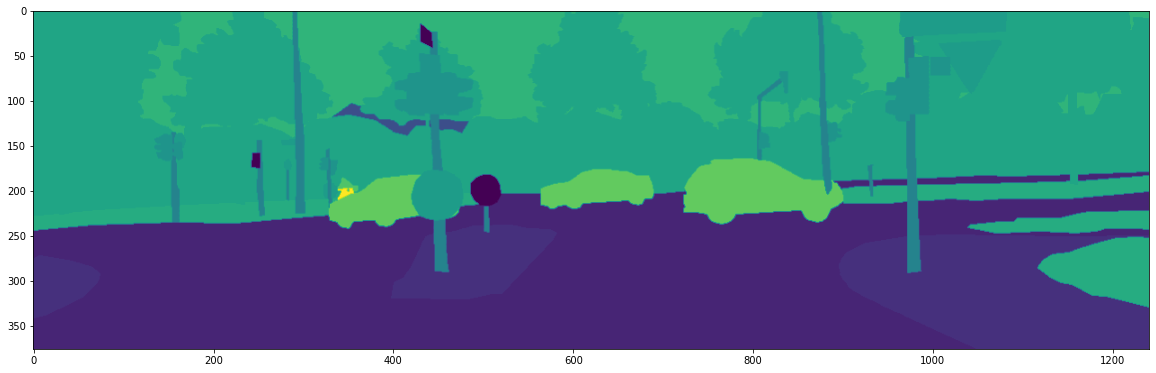

In [19]:
model_device = torch.device("cuda")
data_device = torch.device("cpu")
SPLIT = len(seg_dataset) // 10

seg_dataset1 = KITTI_SEM(KITTI_SEM_TRAIN_RGB_PATHS, KITTI_SEM_TRAIN_LABEL_PATHS, is_val=False, device=data_device, original=True)
train_seg_dataset = Subset(seg_dataset, np.arange(SPLIT, len(seg_dataset)))
train_seg_dataloader = DataLoader(train_seg_dataset, batch_size=7, shuffle=True, num_workers=2, drop_last=True)

seg_dataset2 = KITTI_SEM(KITTI_SEM_TRAIN_RGB_PATHS, KITTI_SEM_TRAIN_LABEL_PATHS, is_val=True, device=data_device, original=True)
test_seg_dataset = Subset(seg_dataset, np.arange(0, SPLIT))
test_seg_dataloader = DataLoader(test_seg_dataset, batch_size=1, shuffle=False, num_workers=2, drop_last=True)

seg_dataset2.example()

In [3]:
x = torch.zeros(240, 480)
x = torchvision.transforms.Resize((240, 360))(x)

ValueError: size shape must match input shape. Input is 1D, size is 2